m
[1.00001274]
merr
[0.00032277]


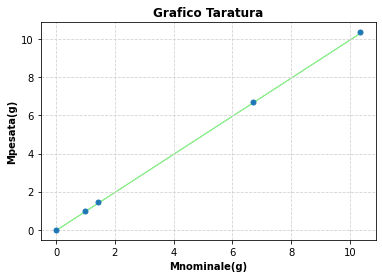

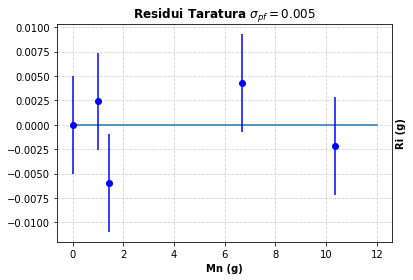

Errore = MaxResidui/sqrt(3)
0.004147409662801467
sigma_post_fit
0.004020721455569821


In [3]:
#CALCOLO TARATURA
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Mn = np.array([0,0.9974,6.6942,10.3577,1.444])
Mp = np.array([0,0.995,6.69,10.36,1.45])

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, Mn, Mp,sigma=np.ones(len(Mn))*0.005)

merr = np.sqrt(np.diag(pcov))
m = popt

print("m")
print(m)
print("merr")
print(merr)

x = np.linspace(min(Mn),max(Mn),1000)

y = m*x 

y_erroreMin = (m-merr)*x

y_erroreMax = (m+merr)*x

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico Taratura",fontweight="bold")

plt.xlabel("Mnominale(g)",fontweight="bold")
plt.ylabel("Mpesata(g)",fontweight="bold")
plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.errorbar(Mn,Mp, markersize=5, yerr=0.01, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
fig.savefig(f'Grafico_Taratura.pdf',dpi = 300)

Mf = m*Mn

Ri = Mf-Mp

fig = plt.figure()
ax = fig.gca()
ax.yaxis.set_label_position("right")
plt.title("Residui Taratura $\sigma_{pf} = 0.005$",fontweight="bold")
plt.xlabel("Mn (g)",fontweight="bold")
plt.ylabel("Ri (g)",fontweight="bold")
plt.plot(np.linspace(0,12,1000),np.zeros(1000))
plt.errorbar(Mn,Ri, yerr=0.005, color='blue',zorder=3, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
fig.savefig(f'Residui_Taratura.pdf',dpi = 300)



MaxResidui = np.abs(Ri)



print("Errore = MaxResidui/sqrt(3)")
print(np.max(MaxResidui)/3**(1/3))


sigma_post_fit = (np.sum((Mf-Mp)**2)/(len(Mf)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)